# **Multileyer Perceptron**

Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers—the input layer, output layer and hidden layer.

In [109]:
# Import Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [110]:
# Loads tips dataset
tips = sns.load_dataset("tips")

#### Preprocessing

In [111]:
# Converting categorical variable to dummy variable
tips = pd.get_dummies(tips,drop_first=True)

In [112]:
# Selecting features and targets(predicting 'tip' based on the other features)
X = tips.drop('tip',axis=1)
y = tips['tip']

In [113]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [114]:
# Standarddizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Building the model

In [115]:
#dfine the layers of the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
                          tf.keras.layers.Dense(1)
                          ])


d:\Python Projects\ML Projects\iqraenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
# compile the model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [117]:
#Train the model
history = model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=0,validation_data=(X_test,y_test))

In [118]:
#Evaluate the model(using mean squared error)
loss = model.evaluate(X_test,y_test,verbose=0)
loss

[0.8959723711013794, 0.040816325694322586]

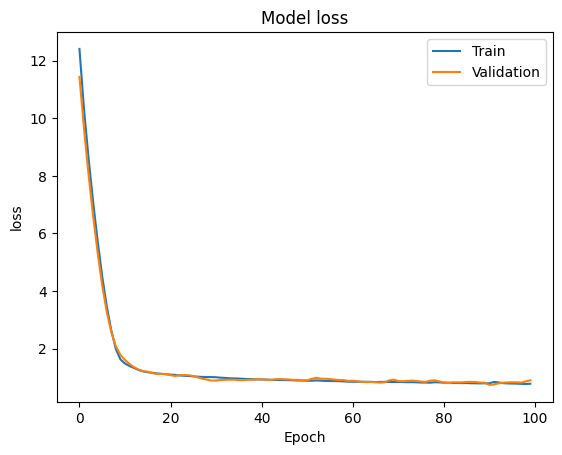

In [119]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()